<a href="https://colab.research.google.com/github/Sinrez/pyCoursera/blob/master/Copy_of_P01_Salmon_Seabass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salmon_seabass.csv')
# both species are endcoded in the data set as follows:
#   0 ... salmon
#   1 ... sea bass
df

,index,lightness,length,species
0,0,2.834754,21.087143,0
1,1,3.329180,18.877143,0
2,2,3.690492,19.824286,0
3,3,4.812459,17.760000,0
4,4,4.812459,16.497143,0
...,...,...,...,...
126,126,8.976774,18.656940,1
127,127,5.365806,21.308897,1
128,128,6.226452,20.203915,1
129,129,8.789677,16.054093,1


In [4]:
df.loc[(df.species == 0),'target'] = 'Salmon'
df.loc[(df.species == 1),'target'] = 'Sea Bass'
df

,index,lightness,length,species,target
0,0,2.834754,21.087143,0,Salmon
1,1,3.329180,18.877143,0,Salmon
2,2,3.690492,19.824286,0,Salmon
3,3,4.812459,17.760000,0,Salmon
4,4,4.812459,16.497143,0,Salmon
...,...,...,...,...,...
126,126,8.976774,18.656940,1,Sea Bass
127,127,5.365806,21.308897,1,Sea Bass
128,128,6.226452,20.203915,1,Sea Bass
129,129,8.789677,16.054093,1,Sea Bass


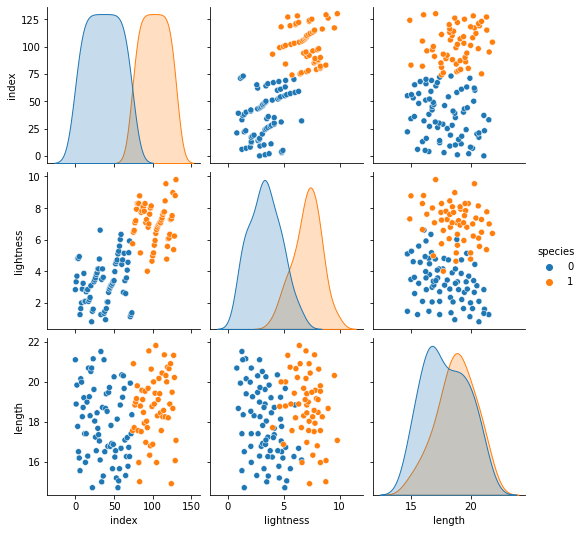

In [5]:
sns.pairplot(df, hue="species")

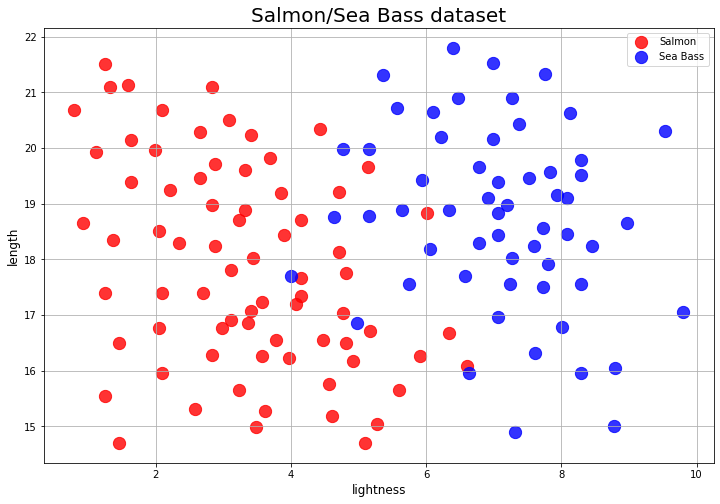

In [6]:
data_to_plot = [df[df.species==0], df[df.species==1]]

plt.figure(figsize=(12, 8))

for i, data in enumerate(data_to_plot):
    plt.scatter(x=data.lightness, y=data.length, c=['red','blue'][i], s=150,
                label=['Salmon','Sea Bass'][i], alpha=0.8)

plt.title("Salmon/Sea Bass dataset", fontsize=20)
plt.xlabel('lightness', fontsize=12)
plt.ylabel('length', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [8]:
names = [ "Naive Bayes", "Logistic Regression", "Nearest Neighbors 3", "Decision Tree 2", "Decision Tree Max", "Random Forest",
        'SVC with linear kernel', 'SVC with RBF kernel','SVC with polynomial (degree 3) kernel', 'LinearSVC ', 'SVC with sigmoid kernel']

classifiers = [
    GaussianNB(),
    LogisticRegression(C = 10000),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth = 2,  random_state = 123),
    DecisionTreeClassifier( random_state = 123),
    RandomForestClassifier(n_estimators=25, random_state = 123),
    SVC(kernel='linear', C =  100, max_iter = 30000),
    SVC(kernel='rbf', gamma=0.7, C =  10000, max_iter = 30000),
    SVC(kernel='poly', degree=3, C =  100, max_iter = 30000),
    LinearSVC(C =  100, max_iter = 30000),
    SVC(kernel='sigmoid', C =  10, gamma=0.1, max_iter = 30000)    
    ]

In [9]:
import pandas as pd
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import preprocessing

x_label='lightness'
y_label='length'

X=df[[x_label, y_label]]
y = df['species']

scaler = preprocessing.MinMaxScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

h = .02  # step size in the mesh
x_min, x_max = X.min()[0] - 0.1, X.max()[0] + 0.1
y_min, y_max = X.min()[1] - 0.1, X.max()[1] + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
cm = plt.cm.RdBu

cmap_light = ListedColormap(['red', 'green', 'blue'])
cmap_bold = ListedColormap(['darkred', 'darkgreen', 'darkblue'])


# перемешиваем данные с равномерным распределение по выборкам
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=123,stratify=y)

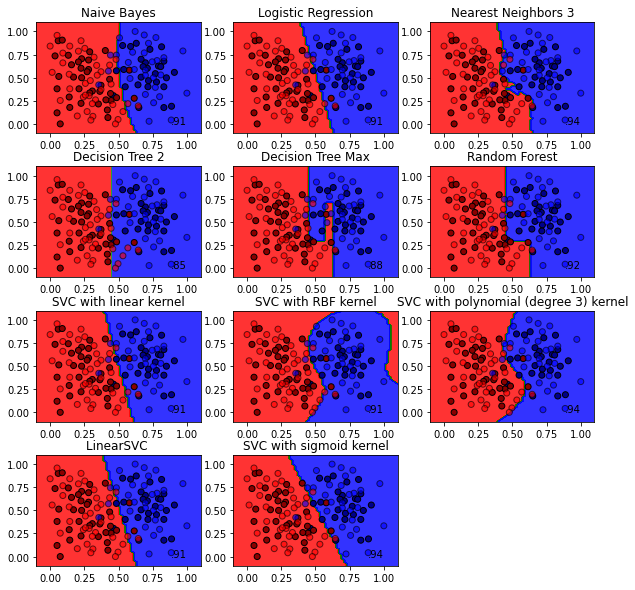

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

fig = plt.figure(figsize=(10,10))

# iterate over classifiers
i = 1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(4, 3, i)
    clf.fit(X_train.values, y_train)
    score = clf.score(X_test.values, y_test)
    
    clf_pred = clf.predict(X_test.values)
    clf_acc = accuracy_score(y_test, clf_pred)
        
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=.8)
   
    # Plot the training points
    ax.scatter(x=X_train[x_label], y=X_train[y_label], c=y_train, cmap=cmap_bold, alpha=1.0, edgecolor="black")
    ax.scatter(x=X_test[x_label], y=X_test[y_label], c=y_test, cmap=cmap_light, alpha=0.6, edgecolor="black")
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(name)
    ax.text(xx.max() - .1, yy.min() + .1, ('%.2f' % score).lstrip('0'), size=10, horizontalalignment='right')
    i += 1
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()